In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
#import csv
import pandas as pd
import matplotlib 
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 12, 8
pd.options.display.mpl_style = 'default'
%matplotlib inline

/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Import data and libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline

files = glob.glob('./data/*[tT].csv')
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
meta0 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

#files = glob.glob('./data/*[tT].csv')
files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames)
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [209]:
execfile('importibuttondata.py')

In [219]:
#x = meta['location:Longitude'].values
#y = meta['location:Latitude'].values
#colors = tempDF.mean(axis=0).values # The colors will show the mean temp at that location
#x.shape, y.shape, colors.shape

In [220]:
#np.setdiff1d()

http://osm.woc.noaa.gov/mapcache
id: OGC:WMS, version: 1.1.1
title: OSM MapServer Provided by NOAA WOC, abstract: None
available layers:
['osm', 'rootlayer']
projection options:
['EPSG:900913', 'EPSG:4326', 'EPSG:3857']


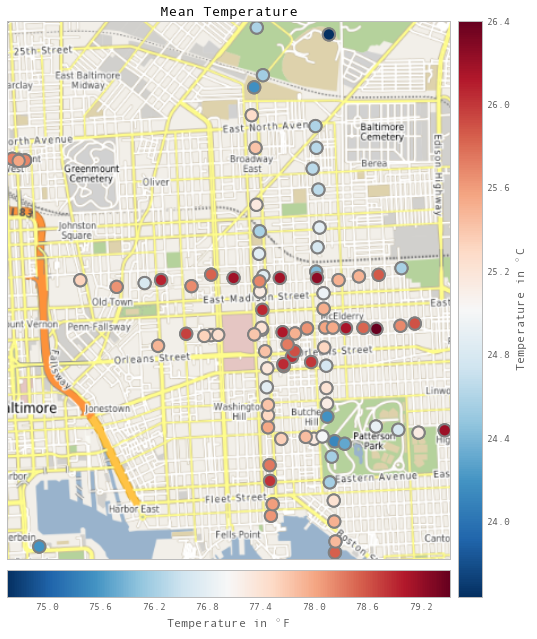

In [228]:
fig  = plt.figure(figsize=(30, 30))
x = meta['location:Longitude'].values
y = meta['location:Latitude'].values
c = tempDF.mean(axis=0).values # The colors will show the mean temp at that location
marker_size = 150
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=meta['location:Longitude'].min()-.0005,
            llcrnrlat=meta['location:Latitude'].min()-.0005,
            urcrnrlon=meta['location:Longitude'].max()+.0005,
            urcrnrlat=meta['location:Latitude'].max()+.0005,
            projection='mill',
            #projection = 'merc',
            resolution ='h',
            #area_thresh=1000.
            epsg=3857
            )
wms_server = "http://osm.woc.noaa.gov/mapcache" 
map.wmsimage(wms_server, layers = ["osm"], verbose = True)

#m.drawmapboundary(fill_color='#a6bddb')
#m.drawcounties()
#m.fillcontinents(color = '#f0f0f0', zorder =0 )

celsius = m.scatter(x,y, s = marker_size, 
                    c = c, 
                    cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

fahr = m.scatter(x,y, s = marker_size, c =(c[:]*9./5. + 32.),
                 cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')

cbar2 = m.colorbar(fahr, location = 'bottom', label = 'Temperature in $^\circ $F')

plt.title('Mean Temperature')
#plt.show()
plt.savefig('meantempmap.png')

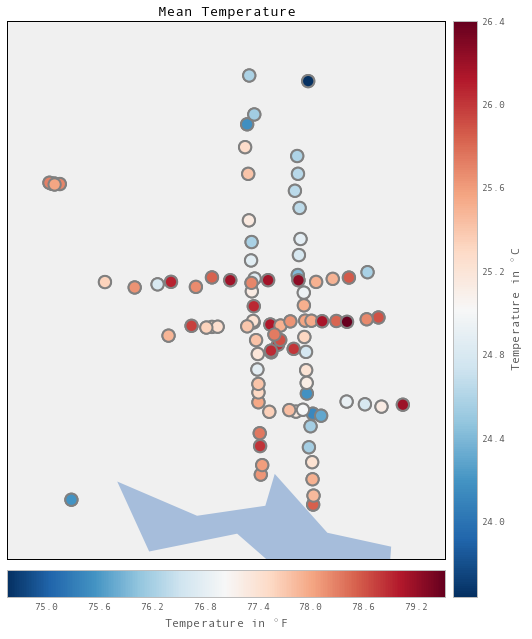

In [226]:
fig  = plt.figure(figsize=(20, 15))
x = meta['location:Longitude'].values
y = meta['location:Latitude'].values
c = tempDF.mean(axis=0).values # The colors will show the mean temp at that location
marker_size = 150
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=meta['location:Longitude'].min()-.005,
            llcrnrlat=meta['location:Latitude'].min()-.005,
            urcrnrlon=meta['location:Longitude'].max()+.005,
            urcrnrlat=meta['location:Latitude'].max()+.005,
            projection='mill',
            #projection = 'merc',
            resolution ='h',
            #area_thresh=1000.
            epsg=3857
            )
#wms_server = "http://osm.woc.noaa.gov/mapcache" 
#map.wmsimage(wms_server, layers = ["osm"], verbose = True)

m.drawmapboundary(fill_color='#a6bddb')
#m.drawcounties()
m.fillcontinents(color = '#f0f0f0', zorder =0 )

celsius = m.scatter(x,y, s = marker_size, 
                    c = c, 
                    cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

fahr = m.scatter(x,y, s = marker_size, c =(c[:]*9./5. + 32.),
                 cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')

cbar2 = m.colorbar(fahr, location = 'bottom', label = 'Temperature in $^\circ $F')

plt.title('Mean Temperature')
#plt.show()
plt.savefig('meantempmapnobackground.png')

In [ ]:
"""
Produces a map showing London Underground station locations with high
resolution background imagery provided by MapQuest.

"""
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import MapQuestOSM


def tube_locations():
    """
    Returns an (n, 2) array of selected London Tube locations in Ordnance
    Survey GB coordinates.

    Source: http://www.doogal.co.uk/london_stations.php

    """
    return np.array([[531738., 180890.], [532379., 179734.],
                     [531096., 181642.], [530234., 180492.],
                     [531688., 181150.], [530242., 180982.],
                     [531940., 179144.], [530406., 180380.],
                     [529012., 180283.], [530553., 181488.],
                     [531165., 179489.], [529987., 180812.],
                     [532347., 180962.], [529102., 181227.],
                     [529612., 180625.], [531566., 180025.],
                     [529629., 179503.], [532105., 181261.],
                     [530995., 180810.], [529774., 181354.],
                     [528941., 179131.], [531050., 179933.],
                     [530240., 179718.]])


def main():
    imagery = MapQuestOSM()

    ax = plt.axes(projection=imagery.crs)
    ax.set_extent((-0.14, -0.1, 51.495, 51.515))

    # Construct concentric circles and a rectangle,
    # suitable for a London Underground logo.
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    concentric_circle = Path.make_compound_path(Path(circle_verts[::-1]),
                                                Path(circle_verts * 0.6))

    rectangle = Path([[-1.1, -0.2], [1, -0.2], [1, 0.3], [-1.1, 0.3]])

    # Add the imagery to the map.
    ax.add_image(imagery, 14)

    # Plot the locations twice, first with the red concentric circles,
    # then with the blue rectangle.
    xs, ys = tube_locations().T
    plt.plot(xs, ys, transform=ccrs.OSGB(),
             marker=concentric_circle, color='red', markersize=9,
             linestyle='')
    plt.plot(xs, ys, transform=ccrs.OSGB(),
             marker=rectangle, color='blue', markersize=11,
             linestyle='')

    plt.title('London underground locations')
    plt.show()


if __name__ == '__main__':
    main()

In [8]:
llcrnrlon=meta['location:Longitude'].min()-.005
llcrnrlat=meta['location:Latitude'].min()-.005
urcrnrlon=meta['location:Longitude'].max()+.005
urcrnrlat=meta['location:Latitude'].max()+.005

print llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon

39.15784233 39.35771436 -76.67485004 -76.56700295


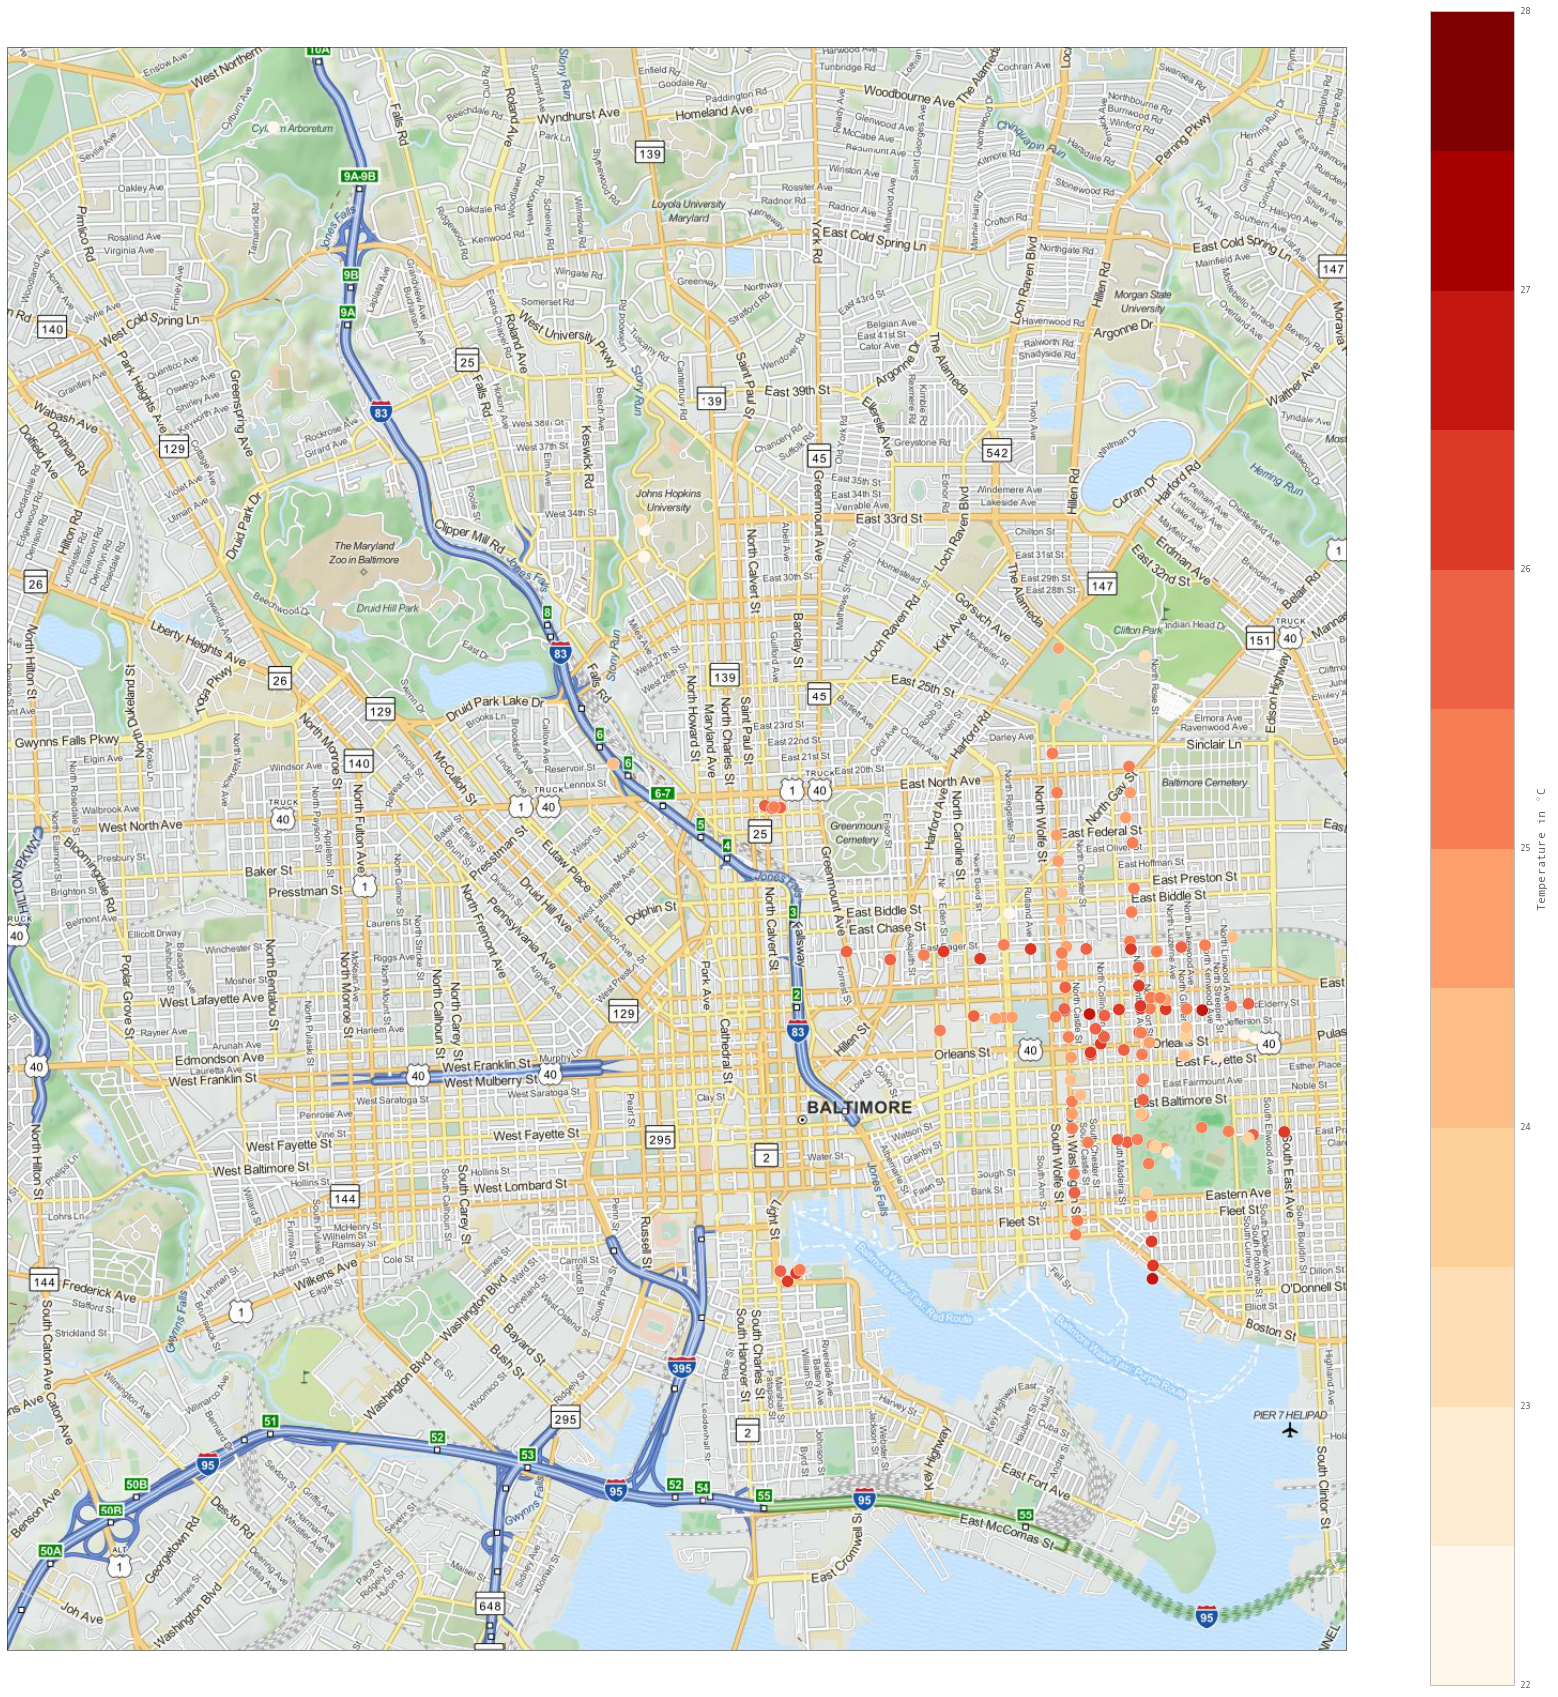

In [70]:
"""
Produces a map showing London Underground station locations with high
resolution background imagery provided by MapQuest.

"""
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import MapQuestOSM
imagery = MapQuestOSM()

figHandle = plt.figure(figsize=[30,30])
ax = plt.axes(projection=imagery.crs)
#ax.set_extent((-0.14, -0.1, 51.495, 51.515))
ax.set_extent(( llcrnrlon, urcrnrlon, llcrnrlat+.1, urcrnrlat))

# Construct concentric circles and a rectangle,
# suitable for a London Underground logo.
theta = np.linspace(0, 2 * np.pi, 100)
circle_verts = np.vstack([np.sin(theta), np.cos(theta)]).T
concentric_circle = Path.make_compound_path(Path(circle_verts[::-1]),
                                            Path(circle_verts * 0.6))

rectangle = Path([[-1.1, -0.2], [1, -0.2], [1, 0.3], [-1.1, 0.3]])

# Add the imagery to the map.
ax.add_image(imagery, 14)

x = meta['location:Longitude']
y = meta['location:Latitude']
c = tempDF[meta.sensornumber].mean()


#plt.plot(x,y,
#         transform=ccrs.Geodetic(),
#         marker=concentric_circle, markersize=15,
#         linestyle='')
cmap = matplotlib.cm.OrRd
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plotHandle = ax.scatter(x,y,c = c, s = 150, transform=ccrs.Geodetic(), 
             cmap = cmap,
             norm = norm)

cbar1 = plt.colorbar(plotHandle, 
                     #location = 'right', 
                     label = 'Temperature in $^\circ $C')

In [ ]:
cmap = matplotlib.cm.OrRd
#if anomaly == '':
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#m.scatter()
celsius = m.scatter(x,y, s = marker_size, c =c ,#(c*9./5. + 32.),
                 cmap = cmap,
                 norm = norm,
                 #cmap = matplotlib.cm.RdBu_r,
                    latlon = True,
                    lw = 2,
                    #edgecolor = 'gray',
                    #vmin = (c.mean()-3)*9/5.,
                    #vmax = (c.mean()+3)*9/5.,
                    )
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

In [64]:
cmap = matplotlib.cm.OrRd
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

ax.scatter(x,y,c = c, s = 150, transform=ccrs.Geodetic(), 
             cmap = cmap,
           #  norm = norm
           )

In [61]:
norm